<a href="https://colab.research.google.com/github/GaurangRawat/Langgraph/blob/main/Langgraph_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install langgraph langchain langchain_community langchainhub ipykernel langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [3]:
from langgraph.graph import Graph

In [4]:
import os
os.environ["GROQ_API_KEY"] = "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"

In [5]:
from langchain_groq import ChatGroq

In [6]:
llm=ChatGroq(model="llama3-70b-8192")

In [7]:
llm.invoke("Hi! How are you?")

AIMessage(content="I'm just a language model, I don't have emotions or feelings, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 16, 'total_tokens': 58, 'completion_time': 0.127692772, 'prompt_time': 0.003534626, 'queue_time': 0.31093468, 'total_time': 0.131227398}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2f30b0b571', 'finish_reason': 'stop', 'logprobs': None}, id='run-9c10efe5-01c3-49c7-bffe-e66d8ccc4b87-0', usage_metadata={'input_tokens': 16, 'output_tokens': 42, 'total_tokens': 58})

In [8]:
llm.invoke("Hi! How are you?").content

"Hi! I'm just a language model, so I don't have feelings or emotions like humans do. However, I'm functioning properly and ready to help you with any questions or tasks you might have! How can I assist you today?"

In [69]:
def function1(input):
  llm=ChatGroq(model="llama3-70b-8192")
  response=llm.invoke("Hi! How are you?").content
  return response


In [70]:
function1("Gaurang!")

"I'm doing well, thank you for asking! I'm a large language model, so I don't have feelings in the same way that humans do, but I'm always happy to chat with you and help with any questions or topics you'd like to discuss. How about you? How's your day going so far?"

In [71]:
def function2(input):
  upper_string=input.upper()
  return upper_string


In [72]:
function2('hi?')

'HI?'

In [73]:
workflow=Graph()

In [74]:
workflow.add_node("llm",function1)
workflow.add_node("upper_string",function2)


In [75]:
workflow.add_edge("llm","upper_string")


In [76]:
workflow.set_entry_point("llm")

In [77]:
workflow.set_finish_point("upper_string")

In [78]:
app=workflow.compile()

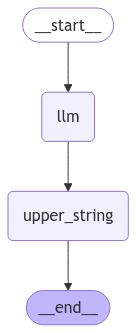

In [79]:
from IPython.display import Image, display
try:
  display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
  #This requires some extr dependencies and its optional
  print(e)


In [80]:
app.invoke("hi!")

"I'M DOING WELL, THANK YOU FOR ASKING! I'M A LARGE LANGUAGE MODEL, SO I DON'T HAVE EMOTIONS LIKE HUMANS DO, BUT I'M ALWAYS HAPPY TO CHAT WITH YOU AND HELP WITH ANY QUESTIONS OR TOPICS YOU'D LIKE TO DISCUSS. HOW ABOUT YOU? HOW'S YOUR DAY GOING?"

In [83]:
app.invoke("my day is good!")

"I'M DOING WELL, THANK YOU FOR ASKING! I'M A LARGE LANGUAGE MODEL, SO I DON'T HAVE FEELINGS OR EMOTIONS LIKE HUMANS DO, BUT I'M ALWAYS HAPPY TO CHAT AND ASSIST WITH ANY QUESTIONS OR TOPICS YOU'D LIKE TO DISCUSS. HOW ABOUT YOU? HOW'S YOUR DAY GOING SO FAR?"